<b> CONTENT RFM ANALYSIS WITH KMEANS: </b> <br>
<B> 1.R_RECENCY <br>
    2.F_FREQUENCY <br>
    3.M_MONETARY <br>
   </B>
   <i> reference code and video: https://www.youtube.com/watch?v=ogZKw7b6V3E </i>

In [1]:
#import library
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
from sklearn.cluster import KMeans
from __future__ import division
import matplotlib.pyplot as plt

import plotly.offline as pyoff
import plotly.graph_objs as go

In [2]:
#import data from file csv
tx_data = pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
#convert field "InvoiceDate" from object to datetime
tx_data['InvoiceDate']=pd.to_datetime(tx_data['InvoiceDate'])
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#Check the distinct value and amount of each country.
tx_data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [5]:
#Create a new dataset with only country is "United Kingdom" because UK consists of most of the data (approximate 90%)
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)
tx_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [6]:
#Change the "InvoiceDate" field data type from datetime to date. 
#We can use date type to filter the time from 04/2011 to 06/2011
#It's the 2nd Quarter of 2011 Year.
tx_uk['InvoiceDate'] = pd.to_datetime(tx_uk['InvoiceDate']).dt.date
tx_3m = tx_uk[(tx_uk.InvoiceDate <= date(2011,6,30)) & (tx_uk.InvoiceDate >= date(2011,4,1))].reset_index(drop=True)
tx_3m

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01,1.65,18161.0,United Kingdom
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01,1.65,18161.0,United Kingdom
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01,0.85,18161.0,United Kingdom
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01,9.95,18161.0,United Kingdom
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
94878,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30,0.42,17891.0,United Kingdom
94879,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30,0.42,17891.0,United Kingdom
94880,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30,0.42,17891.0,United Kingdom
94881,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30,0.42,17891.0,United Kingdom


In [7]:
#Create a sub data by Selecting distinct CustomerID
tx_user = pd.DataFrame(tx_3m['CustomerID'].unique())
tx_user.columns = ['CustomerID']
tx_user

,CustomerID
0,18161.0
1,14886.0
2,17613.0
3,13694.0
4,13758.0
...,...
1824,17921.0
1825,14506.0
1826,16498.0
1827,14702.0


<b> 1.Find the Recency of Each Customer <b>

In [8]:
#Find the lastest day that each customer buy from the groceries --Max Purchased date
tx_max_purchase = tx_3m.groupby('CustomerID').InvoiceDate.max().reset_index()
#change the name of the dataa
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
#Create new column name "Recency" with the formula is: max day from  "MaxPurchaseDate" minus MaxPurchaseDate of each customer
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max()-tx_max_purchase['MaxPurchaseDate']).dt.days
tx_max_purchase

,CustomerID,MaxPurchaseDate,Recency
0,12747.0,2011-06-28,2
1,12748.0,2011-06-30,0
2,12749.0,2011-05-23,38
3,12821.0,2011-05-09,52
4,12826.0,2011-06-24,6
...,...,...,...
1823,18270.0,2011-04-13,78
1824,18272.0,2011-05-11,50
1825,18281.0,2011-06-12,18
1826,18283.0,2011-06-23,7


In [9]:
#Join the data
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on = 'CustomerID')

In [10]:
#get describe from the Recency column
tx_user.Recency.describe()

count    1828.000000
mean       34.083151
std        25.253172
min         0.000000
25%        13.000000
50%        29.000000
75%        51.000000
max        90.000000
Name: Recency, dtype: float64

In [11]:
#Visualize the Recency of Customer using Histogram
plot_data = [
    go.Histogram(
    x=tx_user['Recency'])
]
plot_layout= go.Layout(
    title='Recency')
fig = go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

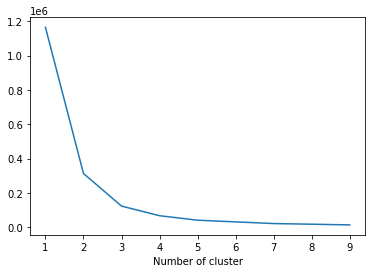

In [12]:
#Find the K-mean, visualize it
sse ={}

tx_recency = tx_user[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [13]:
#Depend on the business rule, we choose the Kmean = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])
#The Recency Cluster value and Mean doesn't fit the ordering.
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,317.0,76.750789,7.849315,63.0,71.0,77.0,84.0,90.0
1,472.0,23.904661,5.337189,16.0,20.0,23.0,28.0,35.0
2,492.0,46.347561,6.722544,36.0,41.0,45.0,52.0,60.0
3,547.0,7.107861,4.687806,0.0,3.0,7.0,11.0,15.0


In [14]:
#Reset the ordering of the Recency Cluster
#Note: ascending is False
df_new = tx_user.groupby('RecencyCluster')['Recency'].mean().reset_index()
df_new = df_new.sort_values(by='Recency', ascending=False).reset_index(drop=True)
df_new

,RecencyCluster,Recency
0,0,76.750789
1,2,46.347561
2,1,23.904661
3,3,7.107861


In [15]:
df_new['index'] = df_new.index
df_new

,RecencyCluster,Recency,index
0,0,76.750789,0
1,2,46.347561,1
2,1,23.904661,2
3,3,7.107861,3


In [16]:
#Finnaly we get the Recency Cluster
tx_user = pd.merge(tx_user,df_new[['RecencyCluster','index']],on='RecencyCluster')
tx_user = tx_user.drop(['RecencyCluster'],axis=1)
tx_user = tx_user.rename(columns={"index":"RecencyCluster"})
tx_user

,CustomerID,Recency,RecencyCluster
0,18161.0,90,0
1,14886.0,90,0
2,15018.0,86,0
3,13626.0,90,0
4,15045.0,90,0
...,...,...,...
1823,14461.0,16,2
1824,17043.0,16,2
1825,17101.0,16,2
1826,17749.0,16,2


<b>2.FREQUENCY </B>

In [17]:
tx_frequency = tx_3m.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency

,CustomerID,InvoiceDate
0,12747.0,31
1,12748.0,633
2,12749.0,54
3,12821.0,6
4,12826.0,10
...,...,...
1823,18270.0,2
1824,18272.0,59
1825,18281.0,7
1826,18283.0,211


In [18]:
tx_frequency.columns = ['CustomerID','Frequency']
tx_frequency

,CustomerID,Frequency
0,12747.0,31
1,12748.0,633
2,12749.0,54
3,12821.0,6
4,12826.0,10
...,...,...
1823,18270.0,2
1824,18272.0,59
1825,18281.0,7
1826,18283.0,211


In [19]:
tx_user = pd.merge(tx_user,tx_frequency, on = 'CustomerID')
tx_user

,CustomerID,Recency,RecencyCluster,Frequency
0,18161.0,90,0,12
1,14886.0,90,0,18
2,15018.0,86,0,13
3,13626.0,90,0,19
4,15045.0,90,0,1
...,...,...,...,...
1823,14461.0,16,2,102
1824,17043.0,16,2,15
1825,17101.0,16,2,17
1826,17749.0,16,2,13


In [20]:
tx_user.Frequency.describe()

count    1828.000000
mean       39.054705
std        63.554340
min         1.000000
25%        12.000000
50%        23.000000
75%        46.000000
max      1686.000000
Name: Frequency, dtype: float64

In [21]:
plot_data = [
    go.Histogram(
    x=tx_user.query('Frequency<1000')['Frequency'])
]
plot_layout = go.Layout(
title = 'Frequency')
fig = go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\2184281173.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\2184281173.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\2184281173.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

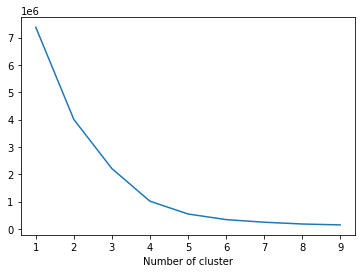

In [22]:
sse ={}

tx_frequency = tx_user[['Frequency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1572.0,23.636768,16.942814,1.0,10.00,20.0,34.0,68.0
1,9.0,497.666667,102.819016,316.0,423.00,505.0,569.0,633.0
2,246.0,114.105691,44.231361,69.0,81.25,101.0,130.0,291.0
3,1.0,1686.000000,NaN,1686.0,1686.00,1686.0,1686.0,1686.0


In [24]:
#Note:ascending=True
df_new = tx_user.groupby('FrequencyCluster')['Frequency'].mean().reset_index()
df_new = df_new.sort_values(by='Frequency', ascending=True).reset_index(drop=True)
df_new

,FrequencyCluster,Frequency
0,0,23.636768
1,2,114.105691
2,1,497.666667
3,3,1686.000000


In [25]:
df_new['index'] = df_new.index
df_new

,FrequencyCluster,Frequency,index
0,0,23.636768,0
1,2,114.105691,1
2,1,497.666667,2
3,3,1686.000000,3


In [26]:
tx_user = pd.merge(tx_user,df_new[['FrequencyCluster','index']],on='FrequencyCluster')
tx_user = tx_user.drop(['FrequencyCluster'],axis=1)
tx_user = tx_user.rename(columns={"index":"FrequencyCluster"})
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,18161.0,90,0,12,0
1,14886.0,90,0,18,0
2,15018.0,86,0,13,0
3,13626.0,90,0,19,0
4,15045.0,90,0,1,0
...,...,...,...,...,...
1823,14606.0,1,3,613,2
1824,13089.0,7,3,423,2
1825,15005.0,0,3,408,2
1826,14298.0,3,3,529,2


<b> 3. REVENUE - MONETARY </B> 

In [27]:
tx_3m['Revenue'] = tx_3m['UnitPrice']*tx_3m['Quantity']
tx_3m

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01,1.65,18161.0,United Kingdom,16.50
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01,1.65,18161.0,United Kingdom,19.80
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01,0.85,18161.0,United Kingdom,10.20
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01,9.95,18161.0,United Kingdom,19.90
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01,2.55,18161.0,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
94878,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04
94879,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04
94880,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04
94881,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04


In [28]:
tx_revenue = tx_3m.groupby('CustomerID').Revenue.sum().reset_index()
tx_revenue

,CustomerID,Revenue
0,12747.0,1147.61
1,12748.0,5331.05
2,12749.0,782.10
3,12821.0,92.72
4,12826.0,114.92
...,...,...
1823,18270.0,-44.20
1824,18272.0,966.74
1825,18281.0,80.82
1826,18283.0,524.68


In [29]:
tx_user = pd.merge(tx_user,tx_revenue, on='CustomerID')
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,18161.0,90,0,12,0,244.79
1,14886.0,90,0,18,0,364.80
2,15018.0,86,0,13,0,140.14
3,13626.0,90,0,19,0,257.23
4,15045.0,90,0,1,0,-102.00
...,...,...,...,...,...,...
1823,14606.0,1,3,613,2,2488.50
1824,13089.0,7,3,423,2,11092.99
1825,15005.0,0,3,408,2,2141.10
1826,14298.0,3,3,529,2,16814.17


In [30]:
tx_user.Revenue.describe()

count     1828.000000
mean       752.093551
std       2027.324959
min      -1462.500000
25%        209.190000
50%        375.665000
75%        737.505000
max      61163.930000
Name: Revenue, dtype: float64

In [31]:
plot_data = [
    go.Histogram(
    x=tx_user.query('Revenue<10000')['Revenue'])
]
plot_layout = go.Layout(
title = 'Monetary Value')
fig = go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\2009371384.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\2009371384.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\2009371384.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

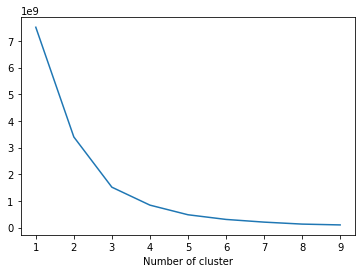

In [32]:
sse ={}

tx_revenue = tx_user[['Revenue']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue)
    tx_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,119.0,3119.873454,1582.876040,1795.37,2047.2250,2423.600,3605.1800,8658.24
1,1.0,61163.930000,NaN,61163.93,61163.9300,61163.930,61163.9300,61163.93
2,1698.0,463.049912,371.317549,-1462.50,193.9025,346.740,628.1100,1763.04
3,10.0,15613.939000,5888.540174,9836.04,11220.2725,14016.535,17192.3575,26444.88


In [34]:
df_new = tx_user.groupby('RevenueCluster')['Revenue'].mean().reset_index()
df_new = df_new.sort_values(by='Revenue', ascending=True).reset_index(drop=True)
df_new

,RevenueCluster,Revenue
0,2,463.049912
1,0,3119.873454
2,3,15613.939000
3,1,61163.930000


In [35]:
df_new['index'] = df_new.index
df_new

,RevenueCluster,Revenue,index
0,2,463.049912,0
1,0,3119.873454,1
2,3,15613.939000,2
3,1,61163.930000,3


In [36]:
tx_user = pd.merge(tx_user,df_new[['RevenueCluster','index']],on='RevenueCluster')
tx_user = tx_user.drop(['RevenueCluster'],axis=1)
tx_user = tx_user.rename(columns={"index":"RevenueCluster"})
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,18161.0,90,0,12,0,244.79,0
1,14886.0,90,0,18,0,364.80,0
2,15018.0,86,0,13,0,140.14,0
3,13626.0,90,0,19,0,257.23,0
4,15045.0,90,0,1,0,-102.00,0
...,...,...,...,...,...,...,...
1823,17511.0,15,3,180,1,14510.07,2
1824,15311.0,1,3,505,2,17318.42,2
1825,13089.0,7,3,423,2,11092.99,2
1826,14298.0,3,3,529,2,16814.17,2


In [37]:
#Calculate the OverallScore
tx_user['OverallScore'] = tx_user['RecencyCluster']+tx_user['FrequencyCluster']+tx_user['RevenueCluster']
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,18161.0,90,0,12,0,244.79,0,0
1,14886.0,90,0,18,0,364.80,0,0
2,15018.0,86,0,13,0,140.14,0,0
3,13626.0,90,0,19,0,257.23,0,0
4,15045.0,90,0,1,0,-102.00,0,0
...,...,...,...,...,...,...,...,...
1823,17511.0,15,3,180,1,14510.07,2,6
1824,15311.0,1,3,505,2,17318.42,2,7
1825,13089.0,7,3,423,2,11092.99,2,7
1826,14298.0,3,3,529,2,16814.17,2,7


In [38]:
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

C:\Users\hi\AppData\Local\Temp\ipykernel_2760\188347877.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,76.656766,18.861386,270.475347
1,47.343882,22.594937,403.362321
2,25.529557,29.485222,466.167833
3,10.466083,40.076586,683.115101
4,8.922481,97.410853,1769.293178
5,6.400000,124.844444,4183.595333
6,3.800000,335.400000,13083.922000
7,2.750000,785.750000,13222.917500


In [39]:
#Categorize the Segment columns with "Low_Value", "Mid_Value", "High_value"
tx_user['Segment']='Low_Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment']='Mid_Value'
tx_user.loc[tx_user['OverallScore']>4,'Segment']='High_value'
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,18161.0,90,0,12,0,244.79,0,0,Low_Value
1,14886.0,90,0,18,0,364.80,0,0,Low_Value
2,15018.0,86,0,13,0,140.14,0,0,Low_Value
3,13626.0,90,0,19,0,257.23,0,0,Low_Value
4,15045.0,90,0,1,0,-102.00,0,0,Low_Value
...,...,...,...,...,...,...,...,...,...
1823,17511.0,15,3,180,1,14510.07,2,6,High_value
1824,15311.0,1,3,505,2,17318.42,2,7,High_value
1825,13089.0,7,3,423,2,11092.99,2,7,High_value
1826,14298.0,3,3,529,2,16814.17,2,7,High_value


In [41]:
#Graph between Revenue & Frequency
tx_graph = tx_user.query("Revenue <50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
    x=tx_graph.query("Segment =='Low_Value'")['Frequency'],
    y=tx_graph.query("Segment =='Low_Value'")['Revenue'],
    mode = 'markers',
    name='Low',
    marker=dict(size=7,
               line=dict(width=1),
               color='blue',
               opacity=0.8)),
    go.Scatter(
    x=tx_graph.query("Segment =='Mid_Value'")['Frequency'],
    y=tx_graph.query("Segment =='Mid_Value'")['Revenue'],
    mode = 'markers',
    name='Mid',
    marker=dict(size=7,
               line=dict(width=1),
               color='green',
               opacity=0.5)),
    go.Scatter(
    x=tx_graph.query("Segment =='High_value'")['Frequency'],
    y=tx_graph.query("Segment =='High_value'")['Revenue'],
    mode = 'markers',
    name='High',
    marker=dict(size=7,
               line=dict(width=1),
               color='red',
               opacity=0.9))
    
]
plot_layout= go.Layout(
    yaxis={'title':"Revenue"},
    xaxis={'title':"Frequency"},
    title='Segments')
fig=go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [42]:
#Graph between Revenue & Recency
tx_graph = tx_user.query("Revenue <50000 and Recency < 2000")

plot_data = [
    go.Scatter(
    x=tx_graph.query("Segment =='Low_Value'")['Recency'],
    y=tx_graph.query("Segment =='Low_Value'")['Revenue'],
    mode = 'markers',
    name='Low',
    marker=dict(size=7,
               line=dict(width=1),
               color='blue',
               opacity=0.8)),
    go.Scatter(
    x=tx_graph.query("Segment =='Mid_Value'")['Recency'],
    y=tx_graph.query("Segment =='Mid_Value'")['Revenue'],
    mode = 'markers',
    name='Mid',
    marker=dict(size=7,
               line=dict(width=1),
               color='green',
               opacity=0.5)),
    go.Scatter(
    x=tx_graph.query("Segment =='High_value'")['Recency'],
    y=tx_graph.query("Segment =='High_value'")['Revenue'],
    mode = 'markers',
    name='High',
    marker=dict(size=7,
               line=dict(width=1),
               color='red',
               opacity=0.9))
    
]
plot_layout= go.Layout(
    yaxis={'title':"Revenue"},
    xaxis={'title':"Recency"},
    title='Segments')
fig=go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [43]:
#Graph between Frequency & Recency
tx_graph = tx_user.query("Frequency <2000 and Recency < 2000")

plot_data = [
    go.Scatter(
    x=tx_graph.query("Segment =='Low_Value'")['Recency'],
    y=tx_graph.query("Segment =='Low_Value'")['Frequency'],
    mode = 'markers',
    name='Low',
    marker=dict(size=7,
               line=dict(width=1),
               color='blue',
               opacity=0.8)),
    go.Scatter(
    x=tx_graph.query("Segment =='Mid_Value'")['Recency'],
    y=tx_graph.query("Segment =='Mid_Value'")['Frequency'],
    mode = 'markers',
    name='Mid',
    marker=dict(size=7,
               line=dict(width=1),
               color='green',
               opacity=0.5)),
    go.Scatter(
    x=tx_graph.query("Segment =='High_value'")['Recency'],
    y=tx_graph.query("Segment =='High_value'")['Frequency'],
    mode = 'markers',
    name='High',
    marker=dict(size=7,
               line=dict(width=1),
               color='red',
               opacity=0.9))
    
]
plot_layout= go.Layout(
    yaxis={'title':"Frequency"},
    xaxis={'title':"Recency"},
    title='Segments')
fig=go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'